## Seaborn
1. It is a data visualization library built on top of matplotlib
2. It has many advanced features which help to build plot, graphs etc with few lines of code
3. It is a comlement not a replacement of matplotlib.
4. Important features
    1. Built in themes for styling matplotlib graphics
    2. Visualizing univariate and bivariate data
    3. Fitting in and visualizing linear regression models
    4. Plotting statistical time series data
    5. Seaborn works well with NumPy and Pandas data structures
    6. It comes with built in themes for styling Matplotlib graphics

In [49]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")

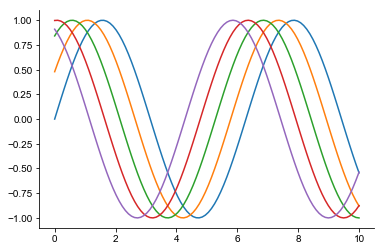

In [5]:
x = np.linspace(0,10,100)
for i in range(5):
    plt.plot(x,np.sin(x+i*.5))
sns.set_style("darkgrid")  #set style
sns.set_palette("husl")    #set palette
sns.despine()              #remove top and right axis

In [6]:
# loading tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


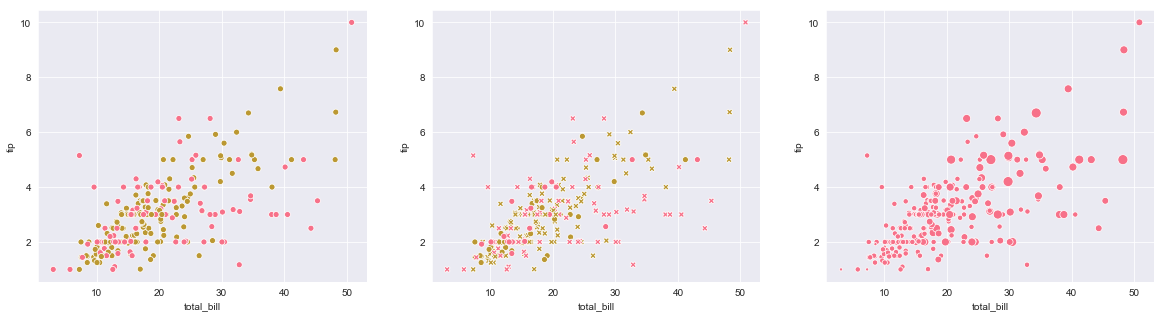

In [50]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3,nrows=1)

"""
x = xaxis
y = yaxis
hue = Grouping of variable, produce element with differnt color (categorical or numerical)
size = Grouping of variable, produce element with diffent size (categorical or numerical)
sizes = (low,high) #sizes for size grouping
style = Grouping of variable, produce element with different style (always trated as categorical)
kind= 'scatter' or 'line'
"""
sns.relplot(x="total_bill", y="tip", data=tips,hue='smoker',ax=ax[0]);
plt.clf()
sns.relplot(x="total_bill", y="tip", data=tips,hue='smoker',style='time',ax=ax[1]);
plt.clf()
sns.relplot(x="total_bill", y="tip", data=tips,size="size",sizes=(10,100),ax=ax[2])
plt.clf()

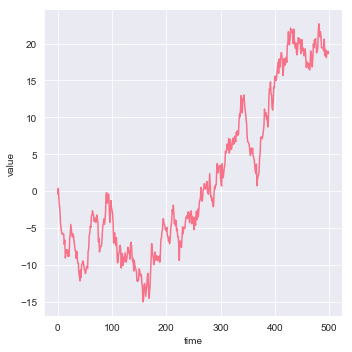

In [10]:
#line
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))  #cumsum is cumulative sum
g = sns.relplot(x="time", y="value", kind="line", data=df)

In [11]:
#Aggregation and representing uncertainty
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


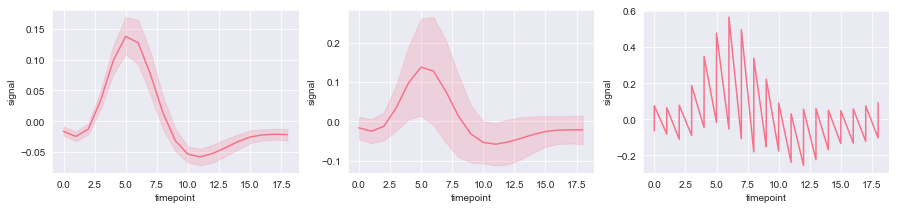

In [57]:
fig,ax = plt.subplots(figsize=(15,3),ncols=3,nrows=1)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, ax=ax[0]);
plt.clf()
#confidence interval
#mean of different samples differs
#how sure that value is mean
#larger the variation the larger is confidence interval
#if there is less variation in data then the confidence interval is less and we are sure mean will be that only
sns.relplot(x="timepoint", y="signal", ci='sd', kind="line", data=fmri,ax=ax[1]);
plt.clf()
#To turn off aggregation altogether, set the estimator parameter to None 
#This might produce a strange effect when the data have multiple observations at each point.
sns.relplot(x="timepoint", y="signal", ci='sd', kind="line",estimator=None, data=fmri,ax=ax[2]);
plt.clf()

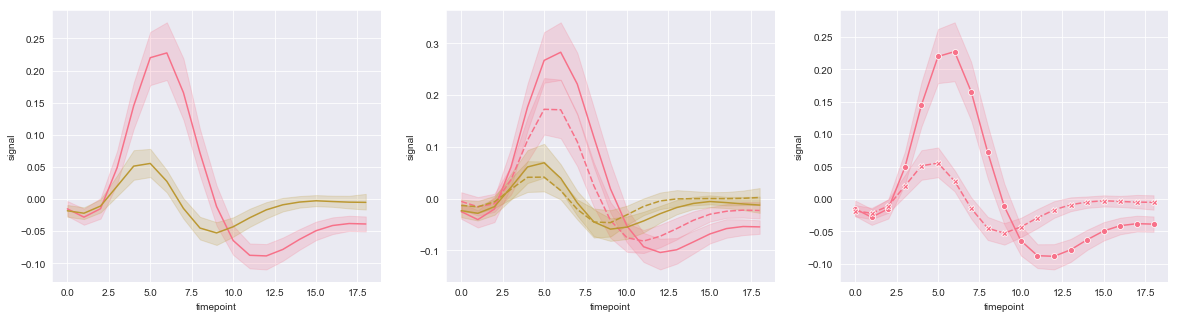

In [58]:
fig,ax = plt.subplots(figsize=(20,5),ncols=3,nrows=1)

#grouping in line 
#red mean time vs signal when event=stim
#blue mean time vs signal when event=cue
sns.relplot(x="timepoint", y="signal",hue="event",kind="line", data=fmri,ax=ax[0]);
plt.clf()

#similary size means line width
#similary style means line style (dotted,dashed,continuous)
sns.relplot(x="timepoint", y="signal",hue="event",kind="line",style='region',data=fmri,ax=ax[1]);
plt.clf()

#markers are used to identify each observation
sns.relplot(x="timepoint", y="signal",style='event',kind='line',markers=True,data=fmri,ax=ax[2]);
plt.clf()

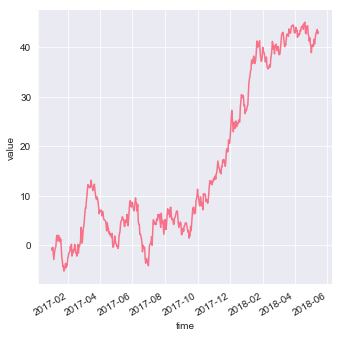

In [59]:
#PLoting date data
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

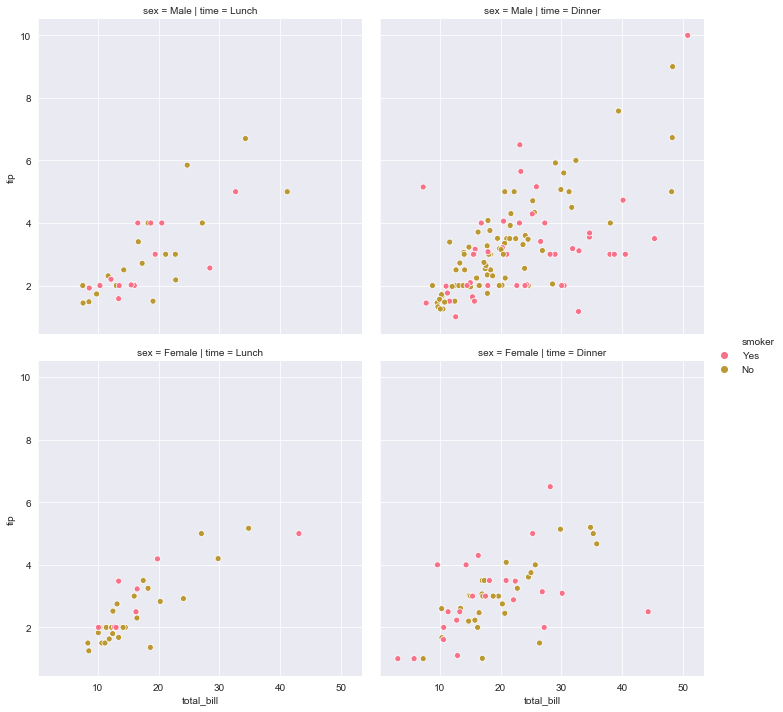

In [61]:
#Showing multiple relationships with facets¶
#showing several semantic variables at once, it’s not always effective to do so. 
#e best approach may be to make more than one plot. 
#Because relplot() is based on the FacetGrid, this is easy to do.
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time",row='sex',
            data=tips);

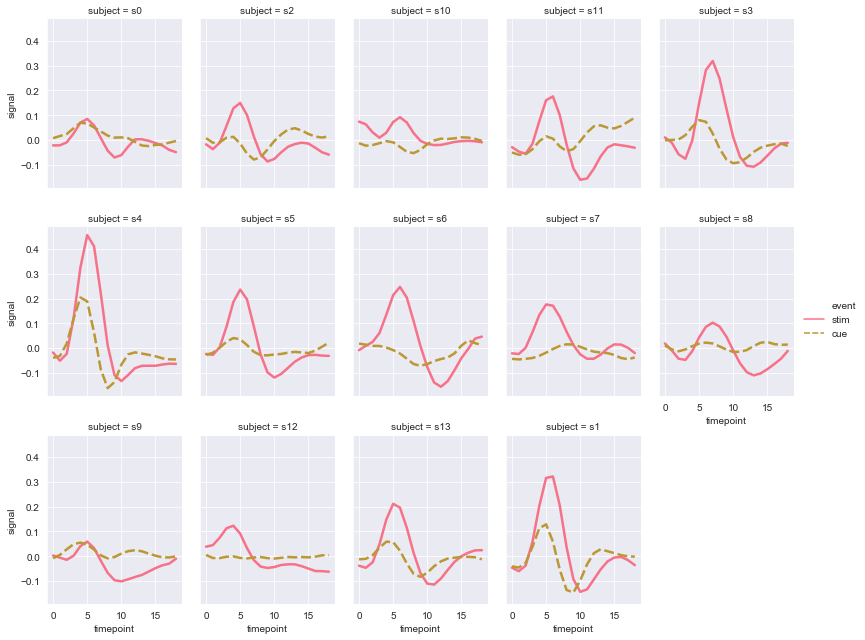

In [62]:
#When you want to examine effects across many levels of a variable, 
#it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

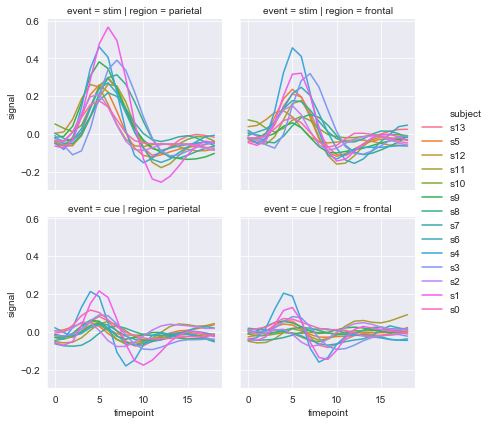

In [63]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);